In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
sys.path.append(os.getcwd() + '/core')
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import core.config as config
from core.model_loader import load_pretrained_VAE
from core.data_loader import TRAIN_loader, TEST_loader
from core.custom_loss import KL_div, VAE_loss
from core.fisher_utils import Calculate_Vanilafisher, Calculate_Vanilascore, Calculate_fisher_VAE, Calculate_score_VAE 
from core.visualize import plot_hist, AUROC

# CIFAR10

In [3]:
train_dist = 'cifar10'
opt = config.VAE_cifar10
netE, netG = load_pretrained_VAE(option=train_dist)
netE.eval()
netG.eval()
dicts = [netE.conv1.weight]

# Train in eval mode

In [84]:
# import torch.optim as optim
# import torchvision.datasets as dset
# import torchvision.transforms as transforms

# netE.eval()
# netG.eval()

# for p in netE.parameters():
#     p.requires_grad = False
# for p in netG.parameters():
#     p.requires_grad = False
# for p in netE.conv1.parameters():
#     p.requires_grad = True
# for p in netE.conv2.parameters():
#     p.requires_grad = True

# optimizer1 = optim.Adam(netE.parameters(), lr=1e-4)
# optimizer2 = optim.Adam(netG.parameters(), lr=1e-4)

# device = 'cuda:0'

# dataset = dset.CIFAR10( root=opt.dataroot, download=True,train = True,
#                                 transform=transforms.Compose([
#                                    transforms.Resize((opt.imageSize)),
#                                    transforms.RandomHorizontalFlip(),
#                                    transforms.ToTensor(),
#                                ]))
# dataloader = torch.utils.data.DataLoader(dataset, batch_size=64,
#                                         shuffle=True, num_workers=int(opt.workers))

# for epoch in range(10):
#     LOSS = []
#     for i, (x, _) in enumerate(dataloader):
#         optimizer1.zero_grad()
#         optimizer2.zero_grad()
#         x = x.to(device)
#         [z,mu,logvar] = netE(x)
#         recon = netG(z)
#         loss = VAE_loss(x, [recon, mu, logvar], beta=opt.beta)
#         loss.backward(retain_graph=True)
#         optimizer1.step()
#         optimizer2.step()
#         LOSS.append(loss.detach().cpu())
#         if i%100==99:
#             print(sum(LOSS)/100)
#             LOSS = []

# Calculate the Fisher & Score (for CIFAR10)

In [68]:
# Fisher_inv, normalize_factor = Calculate_fisher_VAE(netE,
#                                                            netG,
#                                                            TRAIN_loader(option='cifar10'),
#                                                            dicts,
#                                                            opt,
#                                                     max_iter=5
#                                                           )

# cifar_Gradients = Calculate_score_VAE(netE,
#                                       netG,
#                                       TEST_loader(train_dist='cifar10', target_dist='cifar10'),
#                                       dicts,
#                                       opt,
#                                       Fisher_inv,
#                                       normalize_factor,
#                                       entry,
#                                       max_iter=5
#                                      )
# lsun_Gradients = Calculate_score_VAE(netE,
#                                      netG,
#                                      TEST_loader(train_dist='cifar10', target_dist='lsun', shuffle=True),
#                                      dicts,
#                                       opt,
#                                       Fisher_inv,
#                                       normalize_factor,
#                                       entry,
#                                       max_iter=5
#                                     )
# cifar100_Gradients = Calculate_score_VAE(netE,
#                                         netG,
#                                         TEST_loader(train_dist='cifar10', target_dist='cifar100'),
#                                         dicts,
#                                         opt,
#                                         Fisher_inv,
#                                         normalize_factor,
#                                         entry,
#                                         max_iter=5
#                                         )
# noise_Gradients = Calculate_score_VAE(netE,
#                                       netG,
#                                       TEST_loader(train_dist='cifar10', target_dist='noise'),
#                                       dicts,
#                                       opt,
#                                       Fisher_inv,
#                                       normalize_factor,
#                                       entry,
#                                       max_iter=5
#                                      )

In [69]:
# constant_Gradients = Calculate_score_VAE(netE,
#                                       netG,
#                                       TEST_loader(train_dist='cifar10', target_dist='constant'),
#                                       dicts,
#                                       opt,
#                                       Fisher_inv,
#                                       normalize_factor,
#                                       entry,
#                                       max_iter=5
#                                  )
# svhn_Gradients = Calculate_score_VAE(netE,
#                                       netG,
#                                       TEST_loader(train_dist='cifar10', target_dist='svhn'),
#                                       dicts,
#                                       opt,
#                                       Fisher_inv,
#                                       normalize_factor,
#                                       entry,
#                                       max_iter=5
#                                 )

# celeba_Gradients = Calculate_score_VAE(netE,
#                                       netG,
#                                       TEST_loader(train_dist='cifar10', target_dist='celeba'),
#                                       dicts,
#                                       opt,
#                                       Fisher_inv,
#                                       normalize_factor,
#                                       entry,
#                                       max_iter=5
#                                   )

In [23]:
Grads, normalize_factor = Calculate_Vanilafisher(netE,
                                           netG,
                                           TRAIN_loader(option='cifar10'),
                                           dicts,
                                           opt=opt,
                                          )


# lsun_Gradients = Calculate_Vanilascore(netE,
#                                  netG,
#                                  TEST_loader(train_dist='cifar10', target_dist='lsun', shuffle=True),
#                                  dicts,
#                                  Grads,
#                                  normalize_factor,
#                                  max_iter=3000,
#                                  opt=opt,
#                                  with_label=opt.with_label,
#                                 )
# cifar100_Gradients = Calculate_Vanilascore(netE,
#                                   netG,
#                                   TEST_loader(train_dist='cifar10', target_dist='cifar100'),
#                                   dicts,
#                                   Grads,
#                                   normalize_factor,
#                                   max_iter=3000,
#                                   opt=opt,
#                                   with_label=opt.with_label,
#                                  )
# noise_Gradients = Calculate_Vanilascore(netE,
#                                   netG,
#                                   TEST_loader(train_dist='cifar10', target_dist='noise'),
#                                   dicts,
#                                   Grads,
#                                   normalize_factor,
#                                   max_iter=3000,
#                                   opt=opt,
#                                   with_label=opt.with_label,
#                                  )

Files already downloaded and verified


Calculate Fisher:   0%|                                                                    | 0/50000 [00:02<?, ?step/s]

tensor(0., device='cuda:0')


AssertionError: 

In [20]:
a = {}
b = torch.tensor([2.], requires_grad=True).to('cuda')
a['1'] = b
2*a['1']
a

{'1': tensor([2.], device='cuda:0', grad_fn=<CopyBackwards>)}

In [6]:
# constant_Gradients = Calculate_Vanilascore(netE,
#                                   netG,
#                                   TEST_loader(train_dist='cifar10', target_dist='constant'),
#                                   dicts,
#                                   Grads,
#                                   normalize_factor,
#                                   max_iter=3000,
#                                   opt=opt,
#                                   with_label=opt.with_label,
#                                  )
cifar_Gradients = Calculate_Vanilascore(netE,
                                  netG,
                                  TEST_loader(train_dist='cifar10', target_dist='cifar10'),
                                  dicts,
                                  Grads,
                                  normalize_factor,
                                  max_iter=1000,
                                  opt=opt,
                                  with_label=opt.with_label,
                                 )

svhn_Gradients = Calculate_Vanilascore(netE,
                                 netG,
                                 TEST_loader(train_dist='cifar10', target_dist='svhn'),
                                 dicts,
                                 Grads,
                                 normalize_factor,
                                 max_iter=1000,
                                 opt=opt,
                                 with_label=opt.with_label,
                                )

# celeba_Gradients = Calculate_Vanilascore(netE,
#                                    netG,
#                                    TEST_loader(train_dist='cifar10', target_dist='celeba'),
#                                    dicts,
#                                    Grads,
#                                    normalize_factor,
#                                    max_iter=3000,
#                                    opt=opt,
#                                    with_label=opt.with_label,
#                                   )

Files already downloaded and verified


Calculate Score:  10%|█████▋                                                   | 1001/10000 [00:09<01:28, 101.75step/s]


Using downloaded and verified file: ../data\test_32x32.mat


Calculate Score:   4%|██▏                                                       | 1001/26032 [00:10<04:14, 98.43step/s]


# Visualize

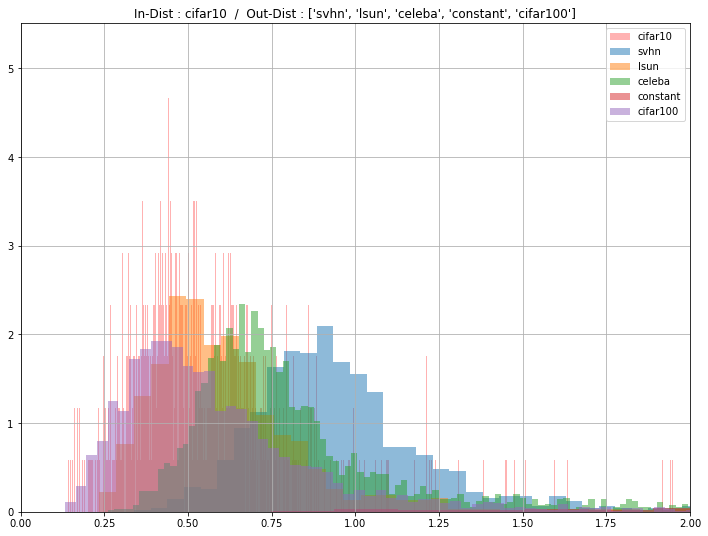

In [87]:
args = [cifar_Gradients, svhn_Gradients,  lsun_Gradients,  celeba_Gradients, constant_Gradients, cifar100_Gradients]
bins = [3000, 300, 300, 3000, 100, 3000]
labels = ['cifar10', 'svhn', 'lsun', 'celeba', 'constant', 'cifar100']
xlim = [0, 2]
plot_hist(*args, bins=bins, labels=labels, xlim=xlim)

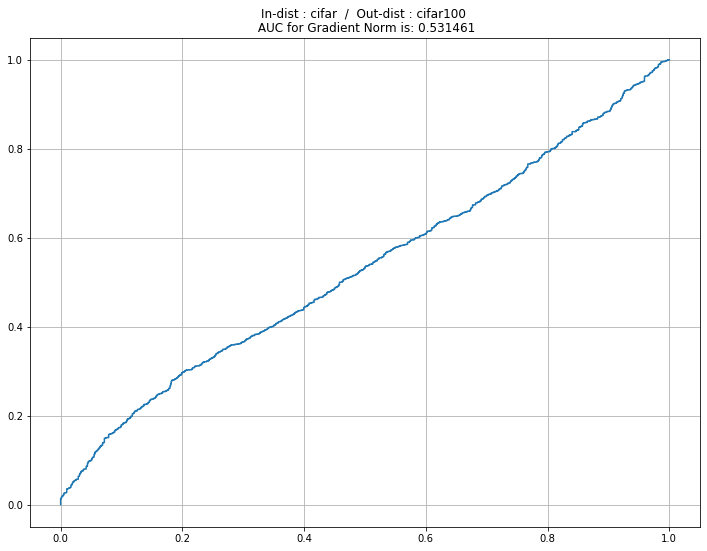

In [88]:
args = [np.array(cifar_Gradients), np.array(cifar100_Gradients)]
labels = ['cifar', 'cifar100']
AUROC(*args, labels=labels)

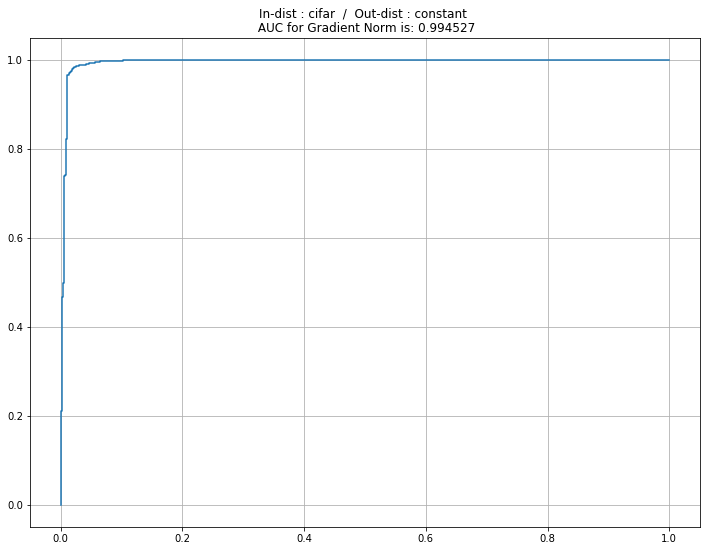

In [89]:
args = [cifar_Gradients, constant_Gradients]
labels = ['cifar', 'constant']
AUROC(*args, labels=labels)

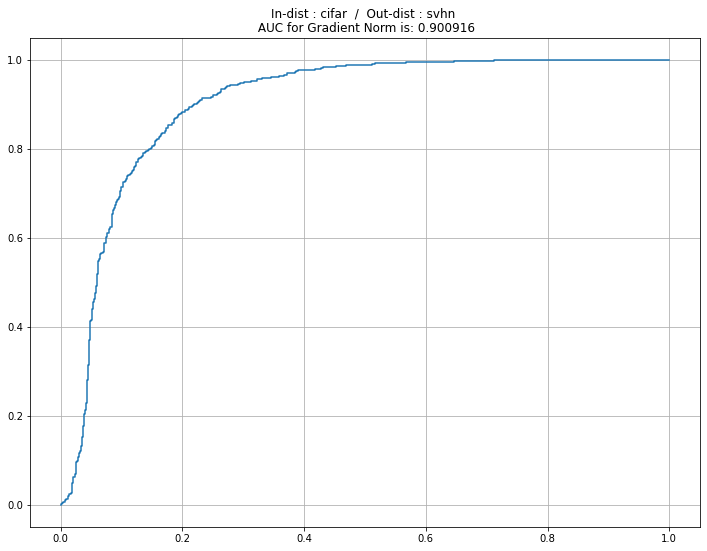

In [7]:
args = [cifar_Gradients, svhn_Gradients]
labels = ['cifar', 'svhn']
AUROC(*args, labels=labels)

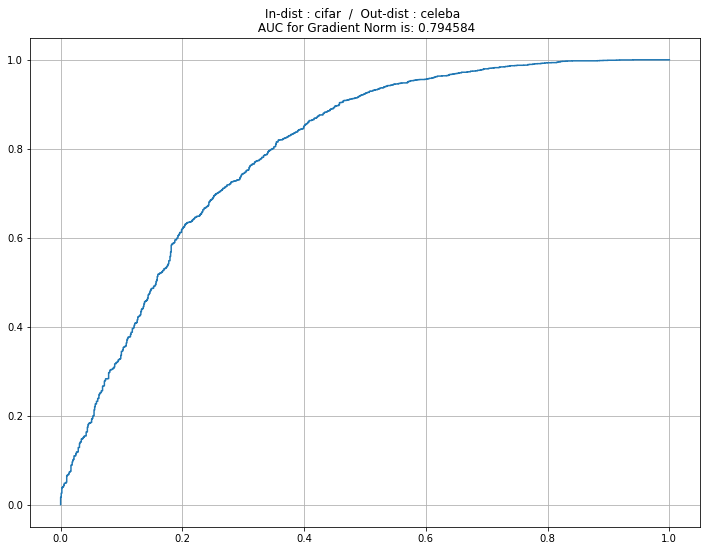

In [91]:
args = [cifar_Gradients, celeba_Gradients]
labels = ['cifar', 'celeba']
AUROC(*args, labels=labels)

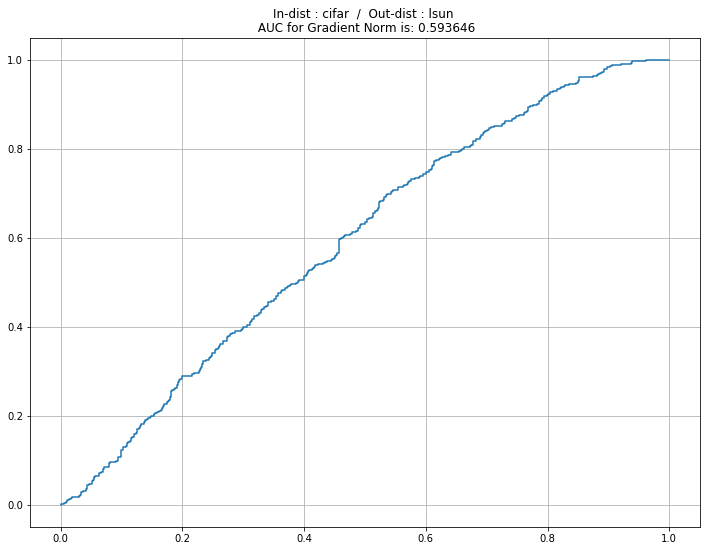

In [92]:
args = [cifar_Gradients, lsun_Gradients]
labels = ['cifar', 'lsun']
AUROC(*args, labels=labels)

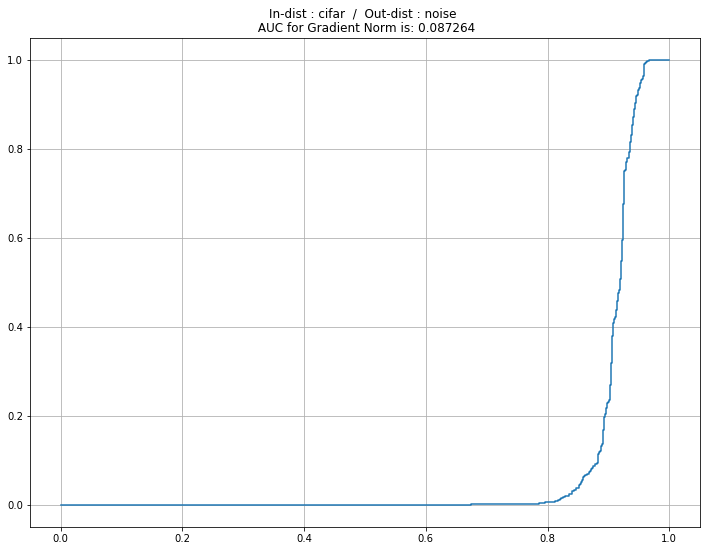

In [93]:
args = [cifar_Gradients, noise_Gradients]
labels = ['cifar', 'noise']
AUROC(*args, labels=labels)

# FMNIST

In [ ]:
train_dist = 'fmnist'
opt = config.VAE_fmnist
netE, netG = load_pretrained_VAE(option=train_dist)

dicts = [netE.conv1.weight]

# Calculate the Fisher & Score (for FMNIST)

In [ ]:
noise=0

Grads, normalize_factor = Calculate_fisher(netE,
                                           netG,
                                           TRAIN_loader(option='fmnist'),
                                           dicts = dicts,
                                           opt=opt,
                                           noise=noise
                                          )
fmnist_Gradients = Calculate_score(netE,
                                   netG,
                                   TEST_loader(train_dist='fmnist', target_dist='fmnist'),
                                   dicts,
                                   Grads,
                                   normalize_factor,
                                   max_iter=5000,
                                   opt=opt,
                                   with_label=opt.with_label,
                                   noise=noise
                                  )
kmnist_Gradients = Calculate_score(netE,
                                  netG,
                                  TEST_loader(train_dist='fmnist', target_dist='kmnist'),
                                  dicts,
                                  Grads,
                                  normalize_factor,
                                  max_iter=5000,
                                  opt=opt,
                                  with_label=opt.with_label,
                                   noise=noise
                                 )

omni_Gradients = Calculate_score(netE,
                                  netG,
                                  TEST_loader(train_dist='fmnist', target_dist='omniglot'),
                                  dicts,
                                  Grads,
                                  normalize_factor,
                                  max_iter=5000,
                                  opt=opt,
                                  with_label=True,
                                 noise=noise
                                 )
mnist_Gradients = Calculate_score(netE,
                                  netG,
                                  TEST_loader(train_dist='fmnist', target_dist='mnist'),
                                  dicts,
                                  Grads,
                                  normalize_factor,
                                  max_iter=5000,
                                  opt=opt,
                                  with_label=opt.with_label,
                                  noise=noise
                                 )
noise_Gradients = Calculate_score(netE,
                                  netG,
                                  TEST_loader(train_dist='fmnist', target_dist='noise'),
                                  dicts,
                                  Grads,
                                  normalize_factor,
                                  max_iter=5000,
                                  opt=opt,
                                  with_label=opt.with_label,
                                  noise=noise
                                 )
constant_Gradients = Calculate_score(netE,
                                  netG,
                                  TEST_loader(train_dist='fmnist', target_dist='constant'),
                                  dicts,
                                  Grads,
                                  normalize_factor,
                                  max_iter=5000,
                                  opt=opt,
                                  with_label=opt.with_label,
                                     noise=noise
                                 )

# Visualize

In [ ]:
args = [fmnist_Gradients, kmnist_Gradients, omni_Gradients, constant_Gradients, mnist_Gradients, noise_Gradients]
bins = [100, 100, 100, 100, 100, 100]
labels = ['fmnist', 'kmnist', 'omniglot', 'constant', 'mnist', 'noise']
xlim = [0, 5]
plot_hist(*args, bins=bins, labels=labels, xlim=xlim)

In [ ]:
args = [fmnist_Gradients, mnist_Gradients]
labels = ['fmnist', 'mnist']
AUROC(*args, labels=labels)

In [ ]:
args = [fmnist_Gradients, kmnist_Gradients]
labels = ['fmnist', 'kmnist']
AUROC(*args, labels=labels)

In [ ]:
args = [fmnist_Gradients, omni_Gradients]
labels = ['fmnist', 'omniglot']
AUROC(*args, labels=labels)

In [ ]:
args = [fmnist_Gradients, constant_Gradients]
labels = ['fmnist', 'constant']
AUROC(*args, labels=labels)

In [ ]:
args = [fmnist_Gradients, noise_Gradients]
labels = ['fmnist', 'noise']
AUROC(*args, labels=labels)

In [ ]:
VAE, Only conv1.weight, VanilaFisher
# FMNIST
## sigma = 0
### mnist : 0.988
### kmnist : 0.995
### omni : 1.0
### const : 0.995
### noise : 0.982

# CIFAR10
## sigma = 0
### svhn : 0.878
### const : 0.978
### celeba : 0.783
### lsun : 0.52
### cifar100 : 0.54
### noise : 0.09